[1] Package import

In [10]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[2] functions   

In [11]:
#activation function
#sigmoid function
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


[3] read data

In [12]:
file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1
    
    
#Datanum
trDataNum=1000
tDataNum=9000
    
trainX = list_image[:,0:1000] 
trainY = list_label[0:1000] 
testX =  list_image[:,1000:10000] 
testY = list_label[1000:10000]

nb_classes = 10

trainY =np.eye(nb_classes)[trainY]
testY = np.eye(nb_classes)[testY]
                          
trainY = trainY.T
testY = testY.T

[4] initailize values

In [13]:
# Epoch num
NUM_EPOCH=10000

#Array for writing loss, accuracy
trLossArray=np.zeros((NUM_EPOCH+1,1))
tLossArray=np.zeros((NUM_EPOCH+1,1))
trAcArray=np.zeros((NUM_EPOCH+1,1))
tAcArray=np.zeros((NUM_EPOCH+1,1))

lr=0.2 #learning Rate

#weight

# np.random.seed(0)

layer_num = 3

u=np.random.randn(196,784)#layer 1 weight (input : input feature) 

v=np.random.randn(49,196)#layer 2 weight (input: w1 output feature) 

w=np.random.randn(10,49)#layer 3  weight (input :w2 output feature) 

#bias 
a=np.zeros((1,1))#layer 1  bias 

b=np.zeros((1,1))#layer 2 bias 

c=np.zeros((1,1))#layer 3 bias 

#X for drawing the graph
x_=np.arange(NUM_EPOCH+1)#X

#ramda
ramda = 0.001

[5] training(gradient decent)

In [14]:
for epoch in range(NUM_EPOCH+1):
    
    #forward propagation(train)
    trZ1=np.dot(u,trainX)+a#Layer 1
    trA1=sigmoid(trZ1)

    trZ2=np.dot(v,trA1)+b#Layer 2
    trA2=sigmoid(trZ2)
    
    trZ3=np.dot(w,trA2)+c#Layer 3
    trA3=sigmoid(trZ3)

    #get train loss
    trloss=-(np.multiply(trainY,np.log(trA3))+np.multiply((1-trainY),np.log(1-trA3)))
    trloss=np.mean(trloss.T,axis=1)
    trloss=1/trDataNum*np.sum(trloss) + ramda/(2*layer_num)*(np.power(u,2).sum() + np.power(v,2).sum() + np.power(w,2).sum())
    trLossArray[epoch]=trloss
    
    #forward propagation(test)
    tZ1=np.dot(u,testX)+a#Layer 1
    tA1=sigmoid(tZ1)
    
    tZ2=np.dot(v,tA1)+b#Layer 2
    tA2=sigmoid(tZ2)
    
    tZ3=np.dot(w,tA2)+c#Layer 3
    tA3=sigmoid(tZ3)
    
    #get test loss
    tloss=-(np.multiply(testY,np.log(tA3))+np.multiply((1-testY),np.log(1-tA3)))
    tloss=np.mean(tloss.T,axis=1)
    tloss=1/tDataNum*np.sum(tloss) + ramda/(2*layer_num)*(np.power(u,2).sum() + np.power(v,2).sum() + np.power(w,2).sum())
    tLossArray[epoch]=tloss
    
    #get Accuracy
    trainPY1=np.argmax(trA3.T,axis=1)
    trainPY2=np.argmax(trainY.T,axis=1)
    trAccuracy=((trainPY1 == trainPY2).sum())/trDataNum
    trAcArray[epoch]=trAccuracy
    
    testPY1 = np.argmax(tA3.T,axis=1)
    testPY2 = np.argmax(testY.T,axis=1)
    tAccuracy=((testPY1 == testPY2).sum())/tDataNum
    tAcArray[epoch]=tAccuracy
    
    #backward propagation
    dz3=trA3-trainY
    dw=1/trDataNum*np.dot(dz3,trA2.T)
    dc=1/trDataNum*np.sum(dz3,axis=1,keepdims=True)
    
    dz2=np.multiply(np.dot(w.T,dz3),trA2*(1.0-trA2))
    dv=1/trDataNum*np.dot(dz2,trA1.T)
    db=1/trDataNum*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=np.multiply(np.dot(v.T,dz2),trA1*(1.0-trA1))
    du=1/trDataNum*np.dot(dz1,trainX.T)
    da=1/trDataNum*np.sum(dz1,axis=1,keepdims=True)
    
    
    #update weight and bias
    u=(1-ramda*lr)*u-lr*du
    a=(1-ramda*lr)*a-lr*da    

    v=(1-ramda*lr)*v-lr*dv
    b=(1-ramda*lr)*b-lr*db
    
    w=(1-ramda*lr)*w-lr*dw
    c=(1-ramda*lr)*c-lr*dc
    
    
    #check the data per epoch 50
    if epoch%100==0:    
        print("epoch :" + str(epoch+1))
        print("train loss :  " +np.array2string(trloss))
        print("test loss :  " +np.array2string(tloss))
        print("train accuracy :  " +np.array2string(trAccuracy))
        print("test accuracy :  " +np.array2string(tAccuracy))


epoch :1
train loss :  28.89030804
test loss :  28.86417916
train accuracy :  0.096
test accuracy :  0.09044444
epoch :101
train loss :  26.25726834
test loss :  26.29493676
train accuracy :  0.557
test accuracy :  0.45188889
epoch :201
train loss :  25.17655593
test loss :  25.22897305
train accuracy :  0.749
test accuracy :  0.58844444
epoch :301
train loss :  24.1672291
test loss :  24.22691805
train accuracy :  0.825
test accuracy :  0.655
epoch :401
train loss :  23.20757192
test loss :  23.27229312
train accuracy :  0.88
test accuracy :  0.69488889
epoch :501
train loss :  22.2910069
test loss :  22.35973688
train accuracy :  0.91
test accuracy :  0.71966667
epoch :601
train loss :  21.41389357
test loss :  21.48584607
train accuracy :  0.924
test accuracy :  0.73955556
epoch :701
train loss :  20.57349065
test loss :  20.64793815
train accuracy :  0.941
test accuracy :  0.75555556
epoch :801
train loss :  19.7675876
test loss :  19.84396716
train accuracy :  0.961
test accuracy 

epoch :7401
train loss :  1.53126461
test loss :  1.59126
train accuracy :  1.
test accuracy :  0.88333333
epoch :7501
train loss :  1.47676665
test loss :  1.53659397
train accuracy :  1.
test accuracy :  0.88322222
epoch :7601
train loss :  1.4244221
test loss :  1.48409054
train accuracy :  1.
test accuracy :  0.88344444
epoch :7701
train loss :  1.37414589
test loss :  1.4336642
train accuracy :  1.
test accuracy :  0.88422222
epoch :7801
train loss :  1.32585625
test loss :  1.38523281
train accuracy :  1.
test accuracy :  0.88488889
epoch :7901
train loss :  1.27947467
test loss :  1.33871742
train accuracy :  1.
test accuracy :  0.88544444
epoch :8001
train loss :  1.23492574
test loss :  1.29404222
train accuracy :  1.
test accuracy :  0.88588889
epoch :8101
train loss :  1.19213702
test loss :  1.25113434
train accuracy :  1.
test accuracy :  0.88633333
epoch :8201
train loss :  1.15103894
test loss :  1.2099238
train accuracy :  1.
test accuracy :  0.88644444
epoch :8301
trai

[6] find correct and wrong 10 images

In [15]:
## find correct Image

count= 0
correctNum = 0
correctImage = np.empty((784,10))
correctLabel = np.empty(10)
while(1):
    
    if(correctNum==10):
        break
    
    tZ1=np.dot(u,testX[:,count:count+1])+a#Layer 1
    tA1=sigmoid(tZ1)
    
    tZ2=np.dot(v,tA1)+b#Layer 2
    tA2=sigmoid(tZ2)
    
    tZ3=np.dot(w,tA2)+c#Layer 3
    tA3=sigmoid(tZ3)

    PY1=np.argmax(tA3.T)
    PY2=np.argmax(testY[:,count:count+1].T)
    if PY1==PY2:
        correctImage[:,correctNum] = testX[:,count]
        correctLabel[correctNum] = PY1
        correctNum = correctNum + 1
        count = count + 1
        
    else: 
        count = count + 1

## find wrong Image
        
count= 0
wrongNum = 0
wrongImage = np.empty((784,10))
wrongLabel = np.empty(10)
while(1):
    
    if(wrongNum==10):
        break
    
    tZ1=np.dot(u,testX[:,count:count+1])+a#Layer 1
    tA1=sigmoid(tZ1)
    
    tZ2=np.dot(v,tA1)+b#Layer 2
    tA2=sigmoid(tZ2)
    
    tZ3=np.dot(w,tA2)+c#Layer 3
    tA3=sigmoid(tZ3)

    PY1=np.argmax(tA3.T)
    PY2=np.argmax(testY[:,count:count+1].T)
    
    if PY1!=PY2:
        wrongImage[:,wrongNum] = testX[:,count]
        wrongLabel[wrongNum] = PY1
        wrongNum = wrongNum + 1
        count = count + 1
        
    else: 
        count = count + 1

[7] Plot the loss curve

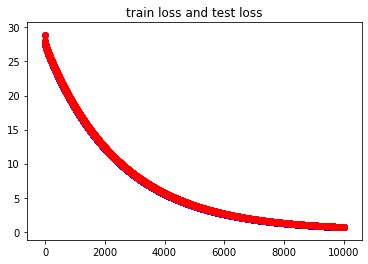

In [16]:
plt.title("train loss and test loss")
plt.scatter(x_,trLossArray ,c="b",)#train loss 
plt.scatter(x_,tLossArray ,c="r")#test loss
plt.show()

[8] Plot the accuracy curve

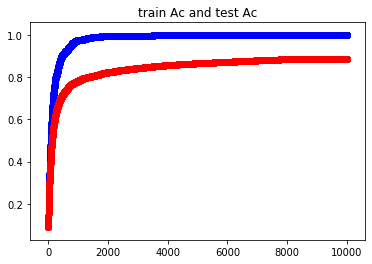

In [17]:
plt.title("train Ac and test Ac")
plt.scatter(x_,trAcArray,c="b")#train ac 
plt.scatter(x_,tAcArray,c="r")#test ac 
plt.show()

[9] Plot the accuracy value

In [18]:
print("Final train accuracy :  " +np.array2string(trAcArray[NUM_EPOCH]))
print("Final test accuracy :  " +np.array2string(tAcArray[NUM_EPOCH]))

Final train accuracy :  [1.]
Final test accuracy :  [0.889]


[10] Plot the classification example

correct 10 images


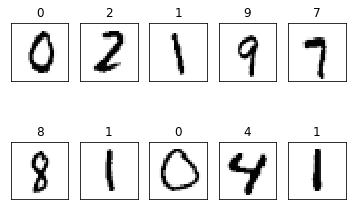

In [19]:
print("correct 10 images")
f1 = plt.figure(1)

for i in range(10):

    label       = int(correctLabel[i])
    im_vector   = correctImage[:,i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

wrong 10 images


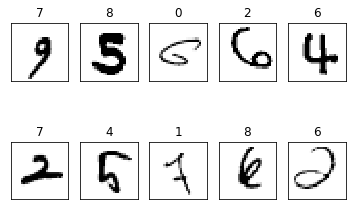

In [20]:
print("wrong 10 images")
f2 = plt.figure(1)

for i in range(10):

    label       = int(wrongLabel[i])
    im_vector   = wrongImage[:,i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()